# Ridge and Lassso Regression

[Harvard Example Resource](https://harvard-iacs.github.io/2017-CS109A/lectures/lecture7/notebook/)

**Note:** After a decent amount of searching, I can't seem to find the data associated with the Harvard resource. I'm gonna leave it here though, as it could certainly come in handy later.

We'll use [this resource](https://refactored.ai/microcourse/notebook?path=content/05-Regression_models_in_Machine_Learning/05-Regularization/03-Lab-Regularization_guided.ipynb) instead, but either way both seem to use `sklearn` for the ridge and lasso. Given this, might as well just follow along with the example to get some practice.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Part 1: Data Cleaning and Prep

In [52]:
credit = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [53]:
print(credit.dtypes)

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object


UghghghGHHG7UUUUUUGGGGHH. After trying to follow along with the code, it turns out that the answers aren't filled in. In that case, we'll just also leave the resource here for reference. Fucking hell.

Let's just do [this example](https://jbhender.github.io/Stats506/F17/Projects/G13/Python.html) real quick and then find another one for lasso.

# Introduction

[Resource](https://jbhender.github.io/Stats506/F17/Projects/G13/Python.html#importing,_scaling,_and_subsetting_data)

Ridge regression method is a "shrinkage method", which is usually applied to a regression model when there is instability resulting from collinearity of predictors.


When the predictors are collinear or almost collinear, the matrix becomes singular (rarely the case) or almost singular, then the inverse would respond sensitively to errors, which results in instability of prediction with such a model.

Ridge regression, however, makes a trade-off between bias and variance in prediction. By introducing a relatively small bias, you may expect a large reduction in the variance, and thus in the mean-squared error. This is achieved by introducing a penalty term into the loss function.

Let's start coding.

In [54]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import csv
import numpy as np
import pandas as pd
from pylab import *
from patsy import dmatrices

# Importing, Scaling, and Subsetting data

Before we implement a regression model, we typically standardize the variables first. it's necessary for ridge regression, since it would change the parameter we estimate. It won't change multicollinearity between predictors, so standardizing the variables could be done before checking for multicollinearity.

Standardizing variables in Python is done with the package `sklearn` using `preprocessing.scale()` to make our data have mean 0 and stdev 1.

We also are going to subset our data for use in ridge regression later, seperating our response variable from our predictor variables

In [55]:
df = pd.read_csv('../data/seatpos.csv')
print(df.head(10))

   Age  Weight  HtShoes     Ht  Seated   Arm  Thigh   Leg  hipcenter
0   46     180    187.2  184.9    95.2  36.1   45.3  41.3    206.300
1   31     175    167.5  165.5    83.8  32.9   36.5  35.9    178.210
2   23     100    153.6  152.2    82.9  26.0   36.6  31.0     71.673
3   19     185    190.3  187.4    97.3  37.4   44.1  41.0    257.720
4   23     159    178.0  174.1    93.9  29.5   40.1  36.9    173.230
5   47     170    178.7  177.0    92.4  36.0   43.2  37.4    185.150
6   30     137    165.7  164.6    87.7  32.5   35.6  36.2    164.750
7   28     192    185.3  182.7    96.9  35.8   39.9  43.1    270.920
8   23     150    167.6  165.0    91.4  29.4   35.5  33.4    151.780
9   29     120    161.2  158.7    85.2  26.6   31.0  32.8    113.880


In [56]:
df["Age"]

0     46
1     31
2     23
3     19
4     23
5     47
6     30
7     28
8     23
9     29
10    47
11    41
12    51
13    30
14    22
15    67
16    25
17    65
18    22
19    21
20    20
21    33
22    24
23    39
24    58
25    22
26    21
27    23
28    21
29    40
30    59
31    47
32    72
33    34
34    19
35    41
36    21
37    56
Name: Age, dtype: int64

In [57]:
df_scaled = preprocessing.scale(df)
df_scaled=pd.DataFrame(df_scaled)

predictors = list(df.columns.values)[1:9]

#xs = df_scaled.drop("Age", axis=1)
df_scaled

,0,1,2,3,4,5,6,7,8
0,0.707992,0.690182,1.437243,1.434497,1.283759,1.167549,1.737795,1.499683,0.703653
1,-0.281114,0.548568,-0.353569,-0.325089,-1.058804,0.205666,-0.563665,-0.108128,0.226397
2,-0.808638,-1.575642,-1.617138,-1.531403,-1.243743,-1.868395,-0.537512,-1.567067,-1.583692
3,-1.072400,0.831796,1.719046,1.661248,1.715283,1.558314,1.423960,1.410360,1.577291
4,-0.808638,0.095403,0.600925,0.454934,1.016624,-0.816335,0.377841,0.189615,0.141786
5,0.773932,0.406954,0.664557,0.717965,0.708393,1.137490,1.188583,0.338486,0.344309
6,-0.347055,-0.527699,-0.517197,-0.406719,-0.257401,0.085430,-0.799042,-0.018805,-0.002291
7,-0.478936,1.030056,1.264525,1.234957,1.633088,1.077373,0.325536,2.035620,1.801562
8,-0.808638,-0.159502,-0.344479,-0.370439,0.502905,-0.846394,-0.825195,-0.852484,-0.222655
9,-0.412995,-1.009186,-0.926266,-0.941851,-0.771120,-1.688042,-2.002078,-1.031130,-0.866585


In [58]:
xs = df_scaled.drop(0, axis=1)
ys = df_scaled.iloc[:, 0]

Ideally, I would've assigned the xs and y using a pandas data frame by title, but... for the sake of consistency we'll do it their way. Also... their index for y was actually out of range for me.

To summarize, this isn't the best way to do it in my eyes. Not to mention they're making this slightly more difficult and complex than it needs to be.

# Variance Inflation Factor (VIF) Calculation

Essentially, the VIF is what you've been looking for in terms of data inspection. Rather than using bivariate comparisons such as a correlation matrix and scatterplots, the VIF enables you to view multicollinearity in a more streamlined manner.

Refer to p[this video](https://www.youtube.com/watch?v=0SBIXgPVex8) for a refresher on VIF.

Now, let'd get back to the actual content.

As you already know, we use ridge regression to address the issue of multicollinearity. In order to do this, we have to first (duh) check for multicollinearity! **The rule of thumb is that a VIF > 10 indicates multicollinearity. In Python, we can use the `statsmodels.stats.otuliers_influence` package to calculate the VIF of a multiple regression output (made by the dmatrices package).

(First, we'll follow their example. Next, we'll try our own method by following the `statsmodels` `variance_inflation_factor` function so we can be certain we're doing it correctly.)

In [ ]:
features = "+".join(df.columns.difference(["hipcenter"]))
y,X = dmatrices('hipcenter ~' + features, df, return_type="dataframe")# idk why they're splitting the data like this... what a mess....

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif.round(1))

   VIF Factor   features
0       741.0  Intercept
1         2.0        Age
2         4.5        Arm
3       333.1         Ht
4       307.4    HtShoes
5         6.7        Leg
6         9.0     Seated
7         2.8      Thigh
8         3.6     Weight


Had to do some hacking to get this to worth with the assistance of Claude. But hey, at least my results match the resource's. Why can't I find a reliable guide on this what the hell? Anyway, let's continue...

It's shown that "Ht" and "HtShoes" have high VIF factors, which means ridge regression is appropriate for this data set.

Here's a more concrete example you could use. I have a feeling the author might have a preference for R programming which is why his code is a bit strange:

`vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]`

Matter of fact, just follow [this example](https://www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/) next time you apply this. The current example is such a fucking mess.

## Ridge Regression

Now we can continue to calculate our coefficients from ridge regression when varying the regularization parameter (alpha). This is done using the Ridge function from sklearn. We'll cycle through varying alpha values and for each alpha will have an array of beta coefficients taken.

**Note: VIF only intake the x values as we're testing the relationships among the predictors, not between the predictors and the target. each feature temporarily becomes a 'y' that gets regressed on all the other features.**

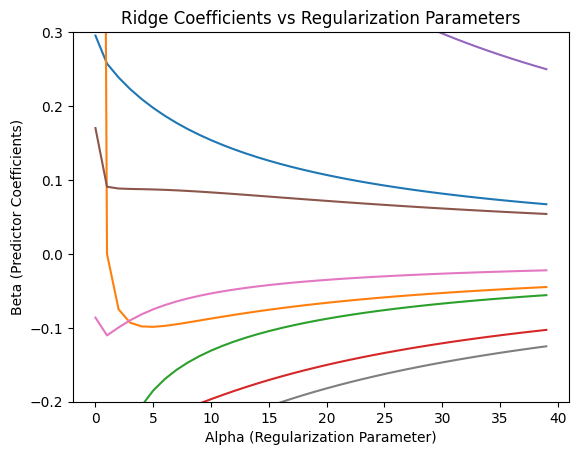

In [75]:
coef=[]
alphas = range(0,40)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(xs,ys)
  coef.append(ridgereg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
ax.set_ylim(-0.2, 0.3)
plt.show();

My graph looks different and I'm not even gonna worry about it cause as long as I have the main idea and some practice that's all that matters.

Moreover, the graph doesn't give valuable insights for actual practice. All it does is show that the coefficients converge towards zero more quickly as alpha increases.

# Selecting Lambda (Alpha in Python's Ridge Regression)

Lambda can be selected through generalized cross validation. Ridge Regression cross validation can ba done using `RidgeCV` across the range of alpha values that we originally testes (0 to 40). We can then select the optimal alpha value as shown.

In [77]:
scaler=StandardScaler()
X_std = scaler.fit_transform(xs)

regr_cv = RidgeCV(alphas=range(1, 40))
model_cv = regr_cv.fit(X_std, ys)

print(model_cv.alpha_)

6


## Things to Consider

Ridge Regression is valuable for multicollinear data but it may be wise to drop a predictor that causes the multicollinarity so that we don't impart bias into our sample.

That was a shit example. Let's try another one.

# Ridge Regression with Python

[Resource](https://www.youtube.com/watch?v=c3SkmBZ0HZw)

In [ ]:
from pydataset import data
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'pydataset'